In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from IPython.display import display, Markdown

# Read the CSV file (adjust the filename as needed)
file_path = "/Users/akkeem/Documents/ClassAssignments/Physics212/Lab16/Experiment16.csv"
try:
    raw_df = pd.read_csv(file_path, skip_blank_lines=False, header=None)
except FileNotFoundError:
    print(f"❌ File not found: {file_path}")
    exit()

# Display the raw data to understand its structure
print("Raw Data:")
display(raw_df)

Raw Data:


,0,1,2,3,4,5,6
0,Experiment 16,NaN,NaN,NaN,NaN,NaN,NaN
1,Period of Oscillation for a pendulum with diff...,NaN,NaN,NaN,NaN,NaN,NaN
2,Target Length (cm),L(cm),10˚,20˚,30˚,70˚,80˚
3,20.0,NaN,0.920,0.904,0.887,0.932,0.957
4,40.0,NaN,1.220,1.256,1.252,1.373,1.480
5,60.0,NaN,1.532,1.525,1.532,1.724,1.738
6,80.0,NaN,1.781,1.798,1.789,1.990,2.011
7,100.0,NaN,2.015,2.019,2.002,2.184,2.234
8,120.0,NaN,2.186,2.221,2.213,2.409,2.424
9,140.0,NaN,2.401,2.419,2.417,2.556,2.647


In [19]:
def extract_table(df, start_text):

    try:
        start_idx = df[df[0].str.contains(start_text, na=False)].index[0]
        # Find next empty row as end
        empty_rows = df[df.isnull().all(axis=1)].index
        end_idx = min([x for x in empty_rows if x > start_idx], default=len(df))
        table = df.iloc[start_idx+1:end_idx].copy()
        # Set headers from first row and remove it
        table.columns = table.iloc[0]
        return table[1:].reset_index(drop=True)
    except Exception as e:
        print(f"Error extracting table starting with '{start_text}': {e}")
        return pd.DataFrame()

In [20]:
def plot_period_vs_length(lengths_m, experimental, theoretical, slope, intercept):
    """Creates and formats the period squared vs length plot."""
    
    plt.figure(figsize=(10, 6))
    
    # Plot experimental data with error bars if available
    plt.plot(lengths_m, experimental, 'bo', label='Experimental Tₚ² (angle avg)')
    plt.plot(lengths_m, theoretical, 'r--', label='Theoretical Tₚ²')
    
    # Plot regression line
    regression_line = slope * lengths_m + intercept
    plt.plot(lengths_m, regression_line, 'b-', 
             label=f'Fit: Tₚ² = {slope:.4f}L + {intercept:.4f}')
    
    # Format plot
    plt.xlabel('Pendulum Length (m)')
    plt.ylabel('Period Squared (s²)')
    plt.title('Pendulum Period Squared vs. Length')
    plt.legend()
    plt.grid(True)
    plt.show()

In [21]:
# 1. Clean and save Period Measurements Table
period_df = extract_table(raw_df, "Period of Oscillation for a pendulum")
if period_df.empty:
    print("❌ Error: Could not extract period measurements table")
    exit()

period_df = period_df.dropna(axis=1, how='all')
if 'L(cm)' in period_df.columns:
    period_df = period_df.drop(columns=['L(cm)'])

period_df = period_df.rename(columns={
    'Target Length (cm)': 'length_cm',
    '10˚': 'period_10deg',
    '20˚': 'period_20deg',
    '30˚': 'period_30deg',
    '70˚': 'period_70deg',
    '80˚': 'period_80deg'
})

try:
    period_df = period_df.apply(pd.to_numeric)
    # Calculate average period and standard deviation
    period_cols = ['period_10deg', 'period_20deg', 'period_30deg', 'period_70deg', 'period_80deg']
    period_df['avg_period'] = period_df[period_cols].mean(axis=1)
    period_df['std_dev'] = period_df[period_cols].std(axis=1)
except Exception as e:
    print(f"❌ Error processing period data: {e}")
    exit()

print("Period Measurements Table:")
display(period_df)

Period Measurements Table:


2,length_cm,period_10deg,period_20deg,period_30deg,period_70deg,period_80deg,avg_period,std_dev
0,20.0,0.920,0.904,0.887,0.932,0.957,0.9200,0.026730
1,40.0,1.220,1.256,1.252,1.373,1.480,1.3162,0.108463
2,60.0,1.532,1.525,1.532,1.724,1.738,1.6102,0.110423
3,80.0,1.781,1.798,1.789,1.990,2.011,1.8738,0.116055
4,100.0,2.015,2.019,2.002,2.184,2.234,2.0908,0.109520
5,120.0,2.186,2.221,2.213,2.409,2.424,2.2906,0.115781
6,140.0,2.401,2.419,2.417,2.556,2.647,2.4880,0.108715


In [22]:
# 2. Clean and save Theoretical Values Table
theory_df = extract_table(raw_df, "Theory values and %Diff")
if theory_df.empty:
    print("❌ Error: Could not extract theoretical values table")
    exit()

theory_df = theory_df.dropna(axis=1, how='all')
theory_df = theory_df.rename(columns={
    'Target Length (cm)': 'length_cm',
    'Theoretical Value, Period at small angles (g = 9.81 m/s^2) Tp = 2π(L/g)^1/2': 'theory_period',
    '10% Diff (10˚)': 'pct_diff_10deg',
    '20% Diff (20˚)': 'pct_diff_20deg',
    '70% Diff (70˚)': 'pct_diff_70deg',
    '80% Diff (80˚)': 'pct_diff_80deg'
})

try:
    # Process percentage values and verify theoretical calculations
    for col in theory_df.columns:
        if col.startswith('pct_diff'):
            theory_df[col] = theory_df[col].str.replace('%', '').astype(float)
        elif col == 'theory_period':
            theory_df[col] = theory_df[col].str.replace('%', '').astype(float) / 100
        else:
            theory_df[col] = pd.to_numeric(theory_df[col])
    
    # Verify theoretical values with physics formula
    theory_df['theory_check'] = 2 * np.pi * np.sqrt(theory_df['length_cm'] * 0.01 / 9.81)
    theory_df['theory_diff'] = (theory_df['theory_period'] - theory_df['theory_check']) / theory_df['theory_check'] * 100
except Exception as e:
    print(f"❌ Error processing theoretical data: {e}")
    exit()

print("\nTheoretical Values Table:")
display(theory_df)


Theoretical Values Table:


12,length_cm,theory_period,pct_diff_10deg,pct_diff_20deg,pct_diff_70deg,pct_diff_80deg,theory_check,theory_diff
0,20.0,0.897,2.55,0.76,-1.13,3.89,0.897140,-0.015638
1,40.0,1.269,-3.84,-1.00,-1.32,8.22,1.268748,0.019864
2,60.0,1.554,-1.41,-1.86,-1.41,10.95,1.553893,0.006914
3,80.0,1.794,-0.74,0.21,-0.29,10.91,1.794281,-0.015638
4,100.0,2.006,0.45,0.64,-0.20,8.87,2.006067,-0.003324
5,120.0,2.198,-0.52,1.07,0.70,9.62,2.197536,0.021117
6,140.0,2.374,1.15,1.91,1.83,7.68,2.373610,0.016426


In [23]:
# 3. Clean and save Squared Periods Table
squared_df = extract_table(raw_df, "Period of Oscillation squared")
if squared_df.empty:
    print("❌ Error: Could not extract squared periods table")
    exit()

squared_df = squared_df.dropna(axis=1, how='all')
squared_df = squared_df.rename(columns={
    'Target Length': 'length_cm',
    '10˚': 'period_sq_10deg',
    '20˚': 'period_sq_20deg',
    '30˚': 'period_sq_30deg',
    '70˚': 'period_sq_70deg',
    '80˚': 'period_sq_80deg'
})

try:
    squared_df = squared_df.apply(pd.to_numeric)
except Exception as e:
    print(f"❌ Error processing squared periods: {e}")
    exit()

print("\nSquared Periods Table:")
display(squared_df)


Squared Periods Table:


23,length_cm,period_sq_10deg,period_sq_20deg,period_sq_30deg,period_sq_70deg,period_sq_80deg
0,20.0,0.846,0.818,0.787,0.869,0.916
1,40.0,1.488,1.578,1.567,1.886,2.190
2,60.0,2.348,2.326,2.348,2.973,3.021
3,80.0,3.172,3.200,3.200,3.960,4.044
4,100.0,4.060,4.076,4.008,4.771,4.991
5,120.0,4.782,4.933,4.898,5.804,5.877
6,140.0,5.765,5.854,5.847,6.535,7.007


In [24]:
# Save cleaned tables
try:
    period_df.to_csv('period_measurements.csv', index=False)
    theory_df.to_csv('theoretical_values.csv', index=False)
    squared_df.to_csv('squared_periods.csv', index=False)
    print("✔ All tables saved as separate CSV files!")
except Exception as e:
    print(f"❌ Error saving files: {e}")

✔ All tables saved as separate CSV files!


In [25]:
print("\nSquared Periods Table:")
display(squared_df)


Squared Periods Table:


23,length_cm,period_sq_10deg,period_sq_20deg,period_sq_30deg,period_sq_70deg,period_sq_80deg
0,20.0,0.846,0.818,0.787,0.869,0.916
1,40.0,1.488,1.578,1.567,1.886,2.190
2,60.0,2.348,2.326,2.348,2.973,3.021
3,80.0,3.172,3.200,3.200,3.960,4.044
4,100.0,4.060,4.076,4.008,4.771,4.991
5,120.0,4.782,4.933,4.898,5.804,5.877
6,140.0,5.765,5.854,5.847,6.535,7.007


In [26]:
# Analysis and plotting
lengths_m = period_df['length_cm'] * 0.01  # Convert cm to m
avg_period_sq = period_df['avg_period']**2
theory_period_sq = theory_df['theory_period']**2

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(lengths_m, avg_period_sq)

# Calculate g from slope (no conversion needed since lengths are already in meters)
g_calculated = (4 * np.pi**2) / slope
percent_error = abs(g_calculated - 9.81) / 9.81 * 100

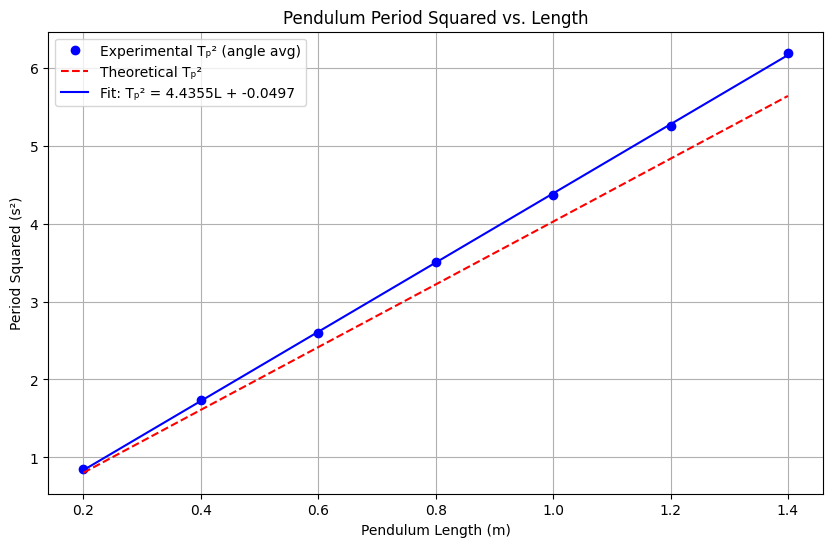

In [27]:
# Create plot
plot_period_vs_length(lengths_m, avg_period_sq, theory_period_sq, slope, intercept)

In [28]:
# Print results
print("\nResults:")
print(f"Calculated g from experiment: {g_calculated:.4f} m/s²")
print(f"Percent error from 9.81 m/s²: {percent_error:.2f}%")
print(f"Regression R-squared value: {r_value**2:.4f}")


Results:
Calculated g from experiment: 8.9005 m/s²
Percent error from 9.81 m/s²: 9.27%
Regression R-squared value: 0.9999


In [29]:
# Check theoretical values
print("\nTheoretical Value Verification:")
print("The 'theory_period' column should match the calculation from length and g=9.81")
display(theory_df[['length_cm', 'theory_period', 'theory_check', 'theory_diff']])


Theoretical Value Verification:
The 'theory_period' column should match the calculation from length and g=9.81


12,length_cm,theory_period,theory_check,theory_diff
0,20.0,0.897,0.897140,-0.015638
1,40.0,1.269,1.268748,0.019864
2,60.0,1.554,1.553893,0.006914
3,80.0,1.794,1.794281,-0.015638
4,100.0,2.006,2.006067,-0.003324
5,120.0,2.198,2.197536,0.021117
6,140.0,2.374,2.373610,0.016426


In [30]:
# Show standard deviations
print("\nPeriod Measurement Standard Deviations:")
display(period_df[['length_cm', 'avg_period', 'std_dev']])


Period Measurement Standard Deviations:


2,length_cm,avg_period,std_dev
0,20.0,0.9200,0.026730
1,40.0,1.3162,0.108463
2,60.0,1.6102,0.110423
3,80.0,1.8738,0.116055
4,100.0,2.0908,0.109520
5,120.0,2.2906,0.115781
6,140.0,2.4880,0.108715


In [31]:
# 5. Calculate g from the slope (convert cm to m)
slope_m = slope
g_calculated = (4 * np.pi**2) / slope_m
print(f"Calculated g from Experiment: {g_calculated:.2f} m/s²")

Calculated g from Experiment: 8.90 m/s²


### 1) Why Take the Average of Five or More Periods of Oscillation?

Taking the average of five or more oscillations improves the accuracy of the measurement for several reasons:

---

**🔄 Reduces Random Errors**

- Minimizes the impact of human reaction times, which can vary by ±0.1–0.3 s.
- Reduces the influence of external factors like air resistance or slight amplitude changes.
- Averages out random fluctuations, providing a more precise period estimate.

---

**✅ Verifies Consistency**

- If individual measurements differ significantly, it can indicate:
    - Miscounting oscillations
    - Experimental setup issues (e.g., swinging inconsistencies)
    - Measurement mistakes or external disturbances

---

**🎯 Increases Reliability**

- A larger sample size reduces the relative error, providing a more statistically reliable result.

### 2) In What Way Are Pendulums and Metronomes Related?

Pendulums and metronomes both rely on **periodic motion** to measure consistent intervals of time:

---

**🕰️ Consistent Time Intervals**

- Both systems use the regular, repeating motion of a pendulum to keep precise time.
- The period of a simple pendulum depends only on its length and the gravitational field strength, making it a reliable timekeeper.

---

**🎶 Musical Timing**

- Metronomes utilize this predictable motion to set a steady tempo for musicians.
- The adjustable length of the metronome's pendulum allows musicians to control the tempo, similar to changing the length of a physical pendulum to adjust its period.


In [32]:
# --- Constants ---
g_earth = 9.8  # m/s²
g_jupiter = 2.4 * g_earth
ratio = (1 / 2.4) ** 0.5
speed_up = (1 - ratio) * 100

# --- Markdown-formatted Explanation ---
markdown_text = f"""
### 3) Effect of Jupiter's Gravity on a Pendulum's Period

The acceleration due to gravity on **Jupiter** is assumed to be 2.4 times that of **Earth**:

$$
g_{{\\text{{Jupiter}}}} = 2.4 \\cdot g_{{\\text{{Earth}}}} = 2.4 \\cdot {g_earth:.1f}\\ \\text{{m/s}}^2 = {g_jupiter:.2f}\\ \\text{{m/s}}^2
$$

The period of a pendulum is given by:

$$
T = 2\\pi \\sqrt{{\\frac{{L}}{{g}}}}
$$

---

**🪐 Period on Earth:**

$$
T_{{\\text{{Earth}}}} = 2\\pi \\sqrt{{\\frac{{L}}{{g_{{\\text{{Earth}}}}}}}}
$$

**🪐 Period on Jupiter:**

$$
T_{{\\text{{Jupiter}}}} = 2\\pi \\sqrt{{\\frac{{L}}{{g_{{\\text{{Jupiter}}}}}}}} = 2\\pi \\sqrt{{\\frac{{L}}{{2.4 \\cdot g_{{\\text{{Earth}}}}}}}}
$$

---

**⚖️ Ratio of Periods:**

$$
\\frac{{T_{{\\text{{Jupiter}}}}}}{{T_{{\\text{{Earth}}}}}} = \\sqrt{{\\frac{{1}}{{2.4}}}} \\approx {ratio:.3f}
$$


This means the pendulum swings **~{speed_up:.1f}% faster** on Jupiter.

Showing that on Jupitr the pendulum would swing faster and have a much shorter period than on Earth.
"""

# --- Display Output ---
display(Markdown(markdown_text))



### 3) Effect of Jupiter's Gravity on a Pendulum's Period

The acceleration due to gravity on **Jupiter** is assumed to be 2.4 times that of **Earth**:

$$
g_{\text{Jupiter}} = 2.4 \cdot g_{\text{Earth}} = 2.4 \cdot 9.8\ \text{m/s}^2 = 23.52\ \text{m/s}^2
$$

The period of a pendulum is given by:

$$
T = 2\pi \sqrt{\frac{L}{g}}
$$

---

**🪐 Period on Earth:**

$$
T_{\text{Earth}} = 2\pi \sqrt{\frac{L}{g_{\text{Earth}}}}
$$

**🪐 Period on Jupiter:**

$$
T_{\text{Jupiter}} = 2\pi \sqrt{\frac{L}{g_{\text{Jupiter}}}} = 2\pi \sqrt{\frac{L}{2.4 \cdot g_{\text{Earth}}}}
$$

---

**⚖️ Ratio of Periods:**

$$
\frac{T_{\text{Jupiter}}}{T_{\text{Earth}}} = \sqrt{\frac{1}{2.4}} \approx 0.645
$$


This means the pendulum swings **~35.5% faster** on Jupiter.

Showing that on Jupitr the pendulum would swing faster and have a much shorter period than on Earth.


In [33]:
markdown_text = """
### 4) Minimizing Friction in a Pendulum Experiment

When analyzing a pendulum’s motion, we typically assume that the effects of friction are minimal. To ensure this assumption is valid in a laboratory setting, we must consider where friction may arise and how it can be minimized.

#### a) Is friction necessary to consider at the following points?

| Location                              | Consider Friction? | Explanation |
|---------------------------------------|---------------------|-------------|
| **i) The pivot**                      | **Yes**             | Friction at the pivot must be considered because it is the mechanical contact point where the pendulum swings. Any friction here directly resists motion, leading to energy loss and damping. To minimize this, a low-friction bearing or lubrication can be used. |
| **ii) The string connection to pivot**| **No**              | If the string is securely tied or looped freely without relative movement, friction at this point is negligible. It does not significantly impact the pendulum's motion. |
| **iii) The string connection to the mass bob** | **No**        | Provided the connection is tight and does not allow relative motion between the string and the bob, friction at this point is minimal and can be neglected. |

In a well-designed lab setup, these frictional influences are minimized so the pendulum closely follows idealized motion for accurate measurement and analysis.
"""

display(Markdown(markdown_text))



### 4) Minimizing Friction in a Pendulum Experiment

When analyzing a pendulum’s motion, we typically assume that the effects of friction are minimal. To ensure this assumption is valid in a laboratory setting, we must consider where friction may arise and how it can be minimized.

#### a) Is friction necessary to consider at the following points?

| Location                              | Consider Friction? | Explanation |
|---------------------------------------|---------------------|-------------|
| **i) The pivot**                      | **Yes**             | Friction at the pivot must be considered because it is the mechanical contact point where the pendulum swings. Any friction here directly resists motion, leading to energy loss and damping. To minimize this, a low-friction bearing or lubrication can be used. |
| **ii) The string connection to pivot**| **No**              | If the string is securely tied or looped freely without relative movement, friction at this point is negligible. It does not significantly impact the pendulum's motion. |
| **iii) The string connection to the mass bob** | **No**        | Provided the connection is tight and does not allow relative motion between the string and the bob, friction at this point is minimal and can be neglected. |

In a well-designed lab setup, these frictional influences are minimized so the pendulum closely follows idealized motion for accurate measurement and analysis.


In [34]:
markdown_text = r"""
### 4b) Minimizing Air Resistance in a Laboratory

Air resistance, or drag force, can affect the motion of a pendulum, especially at higher velocities. The drag force is given by:

$$
F_{\text{drag}} = \frac{1}{2} C_0 \rho A v^2
$$

Where:
- $C_0$ is the drag coefficient,  
- $\rho$ is the density of air,  
- $A$ is the cross-sectional area of the bob,  
- $v$ is the velocity of the bob relative to the air.
---

### ✅ How to Minimize Air Resistance:

- ✅ **Use a small, dense bob**: This reduces the **cross-sectional area \( A \)**, minimizing the amount of air the bob must displace as it swings.  
- ✅ **Choose a spherical shape**: A smooth, spherical object has a lower **drag coefficient \( C_0 \)** compared to irregular shapes.  
- ✅ **Keep oscillation amplitudes small**: Since velocity \( v \) increases with amplitude, smaller swings result in lower speeds — significantly reducing drag, as drag increases with \( v^2 \).

---

By considering these strategies, the impact of air resistance in a lab environment full of air can be effectively minimized, allowing more accurate analysis of ideal pendulum motion.
"""

display(Markdown(markdown_text))



### 4b) Minimizing Air Resistance in a Laboratory

Air resistance, or drag force, can affect the motion of a pendulum, especially at higher velocities. The drag force is given by:

$$
F_{\text{drag}} = \frac{1}{2} C_0 \rho A v^2
$$

Where:
- $C_0$ is the drag coefficient,  
- $\rho$ is the density of air,  
- $A$ is the cross-sectional area of the bob,  
- $v$ is the velocity of the bob relative to the air.
---

### ✅ How to Minimize Air Resistance:

- ✅ **Use a small, dense bob**: This reduces the **cross-sectional area \( A \)**, minimizing the amount of air the bob must displace as it swings.  
- ✅ **Choose a spherical shape**: A smooth, spherical object has a lower **drag coefficient \( C_0 \)** compared to irregular shapes.  
- ✅ **Keep oscillation amplitudes small**: Since velocity \( v \) increases with amplitude, smaller swings result in lower speeds — significantly reducing drag, as drag increases with \( v^2 \).

---

By considering these strategies, the impact of air resistance in a lab environment full of air can be effectively minimized, allowing more accurate analysis of ideal pendulum motion.
